<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.651610,50.017078,0.015637,109.684325,109.671662,0.012663
1,0.0,1.0,75.700795,67.347396,0.008178,153.056369,153.049633,0.006736
2,0.0,2.0,92.514412,87.531633,0.010382,190.056427,190.045505,0.010922
3,0.0,3.0,80.725511,59.267914,-0.003437,149.989987,149.995833,-0.005846
4,0.0,4.0,55.440623,38.851072,-0.000117,104.291577,104.295987,-0.004409
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.760633,71.565103,0.004995,130.330730,130.324185,0.006545
59996,999.0,56.0,31.302354,40.230831,-0.038977,81.494208,81.525071,-0.030863
59997,999.0,57.0,65.487014,53.068258,0.003575,128.558847,128.550389,0.008458
59998,999.0,58.0,77.105669,70.136526,-0.006133,157.236061,157.240929,-0.004868


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.651610,50.017078,0.015637,109.684325,109.671662,0.012663
1,0.0,1.0,75.700795,67.347396,0.008178,153.056369,153.049633,0.006736
2,0.0,2.0,92.514412,87.531633,0.010382,190.056427,190.045505,0.010922
3,0.0,3.0,80.725511,59.267914,-0.003437,149.989987,149.995833,-0.005846
4,0.0,4.0,55.440623,38.851072,-0.000117,104.291577,104.295987,-0.004409
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.760633,71.565103,0.004995,130.330730,130.324185,0.006545
59996,999.0,56.0,31.302354,40.230831,-0.038977,81.494208,81.525071,-0.030863
59997,999.0,57.0,65.487014,53.068258,0.003575,128.558847,128.550389,0.008458
59998,999.0,58.0,77.105669,70.136526,-0.006133,157.236061,157.240929,-0.004868


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.651610  50.017078  0.015637  109.684325  109.671662  0.012663
      1.0    75.700795  67.347396  0.008178  153.056369  153.049633  0.006736
      2.0    92.514412  87.531633  0.010382  190.056427  190.045505  0.010922
      3.0    80.725511  59.267914 -0.003437  149.989987  149.995833 -0.005846
      4.0    55.440623  38.851072 -0.000117  104.291577  104.295987 -0.004409
...                ...        ...       ...         ...         ...       ...
999.0 55.0   48.760633  71.565103  0.004995  130.330730  130.324185  0.006545
      56.0   31.302354  40.230831 -0.038977   81.494208   81.525071 -0.030863
      57.0   65.487014  53.068258  0.003575  128.558847  128.550389  0.008458
      58.0   77.105669  70.136526 -0.006133  157.236061  157.240929 -0.004868
      59.0   23.069554  69.978767 -0.015973  103.032348  103.045940 -0.013593

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.651610  50.017078  0.015637  109.684325  109.671662  0.012663
      1.0    75.700795  67.347396  0.008178  153.056369  153.049633  0.006736
      2.0    92.514412  87.531633  0.010382  190.056427  190.045505  0.010922
      3.0    80.725511  59.267914 -0.003437  149.989987  149.995833 -0.005846
      4.0    55.440623  38.851072 -0.000117  104.291577  104.295987 -0.004409
...                ...        ...       ...         ...         ...       ...
999.0 55.0   48.760633  71.565103  0.004995  130.330730  130.324185  0.006545
      56.0   31.302354  40.230831 -0.038977   81.494208   81.525071 -0.030863
      57.0   65.487014  53.068258  0.003575  128.558847  128.550389  0.008458
      58.0   77.105669  70.136526 -0.006133  157.236061  157.240929 -0.004868
      59.0   23.069554  69.978767 -0.015973  103.032348  103.045940 -0.013593

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.651610,50.017078,0.015637,109.684325,109.671662,0.012663
1,0.0,1.0,75.700795,67.347396,0.008178,153.056369,153.049633,0.006736
2,0.0,2.0,92.514412,87.531633,0.010382,190.056427,190.045505,0.010922
3,0.0,3.0,80.725511,59.267914,-0.003437,149.989987,149.995833,-0.005846
4,0.0,4.0,55.440623,38.851072,-0.000117,104.291577,104.295987,-0.004409
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.760633,71.565103,0.004995,130.330730,130.324185,0.006545
59996,999.0,56.0,31.302354,40.230831,-0.038977,81.494208,81.525071,-0.030863
59997,999.0,57.0,65.487014,53.068258,0.003575,128.558847,128.550389,0.008458
59998,999.0,58.0,77.105669,70.136526,-0.006133,157.236061,157.240929,-0.004868


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.651610  50.017078  0.015637  109.684325  109.671662  0.012663
      1.0    75.700795  67.347396  0.008178  153.056369  153.049633  0.006736
      2.0    92.514412  87.531633  0.010382  190.056427  190.045505  0.010922
      3.0    80.725511  59.267914 -0.003437  149.989987  149.995833 -0.005846
      4.0    55.440623  38.851072 -0.000117  104.291577  104.295987 -0.004409
...                ...        ...       ...         ...         ...       ...
999.0 55.0   48.760633  71.565103  0.004995  130.330730  130.324185  0.006545
      56.0   31.302354  40.230831 -0.038977   81.494208   81.525071 -0.030863
      57.0   65.487014  53.068258  0.003575  128.558847  128.550389  0.008458
      58.0   77.105669  70.136526 -0.006133  157.236061  157.240929 -0.004868
      59.0   23.069554  69.978767 -0.015973  103.032348  103.045940 -0.013593

[60000 rows x 6 columns]

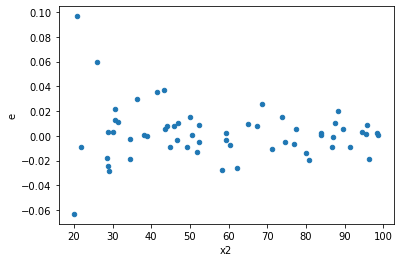

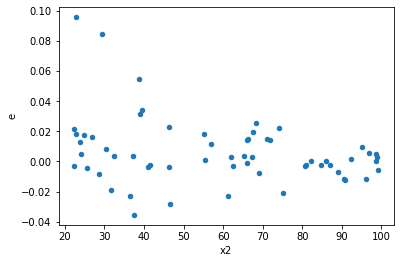

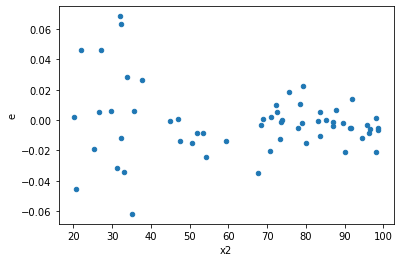

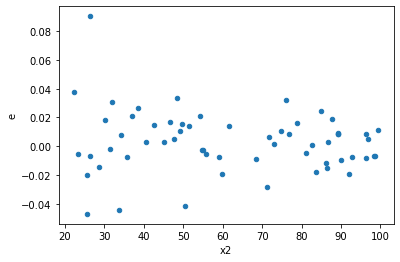

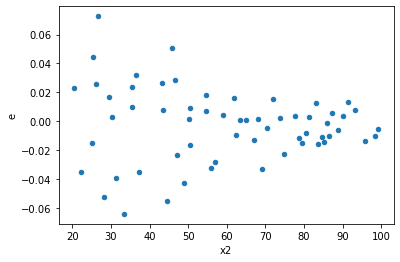

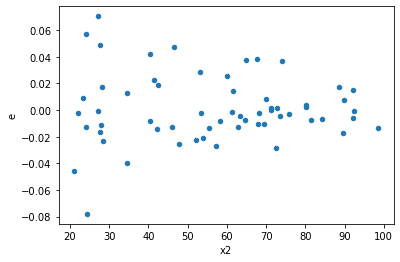

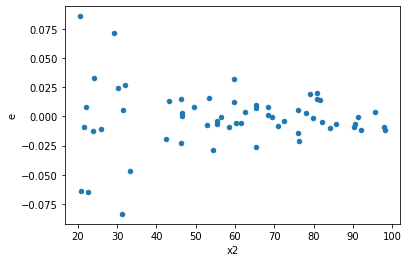

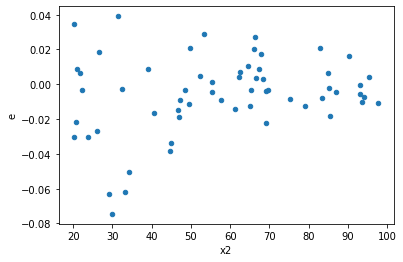

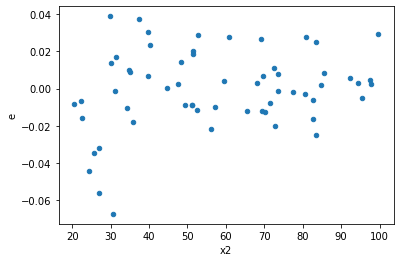

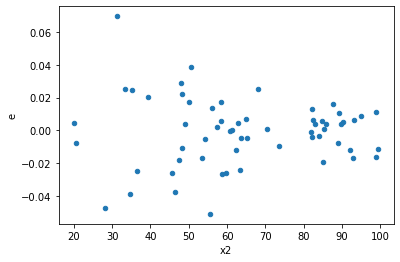

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
25.0,22.0,22.0,0.008365197189836906,0.009137685866131196,0.00038023623590167753,0.00041534935755141797,1.0923455429398372,0.8377494128084639,0.581125293595768,0.41887470640423197,Reject005=1 : Homoscedasticity
82.0,22.0,22.0,0.007564617096800385,0.014668124730040723,0.00034384623167274476,0.0006667329422745783,1.9390439122483698,0.12803146159021406,0.935984269204893,0.06401573079510703,Reject005=1 : Homoscedasticity
128.0,22.0,22.0,0.01034799701821892,0.01138712362354886,0.00047036350082813277,0.00051759652834313,1.1004181392302712,0.8244409109499675,0.5877795445250162,0.41222045547498376,Reject005=1 : Homoscedasticity
131.0,22.0,22.0,0.005294439316116597,0.007131012442691572,0.0002406563325507544,0.00032413692921325326,1.3468871804771345,0.4906656505977902,0.7546671747011049,0.2453328252988951,Reject005=1 : Homoscedasticity
132.0,22.0,22.0,0.006200620363694128,0.0063154447114955395,0.00028184638016791493,0.0002870656687043427,1.0185182031903985,0.966063873001719,0.5169680634991405,0.4830319365008595,Reject005=1 : Homoscedasticity
242.0,22.0,22.0,0.01460444211217708,0.015280357721750099,0.0006638382778262309,0.0006945617146250045,1.046281508350767,0.9164551062642636,0.5417724468678682,0.4582275531321318,Reject005=1 : Homoscedasticity
243.0,22.0,22.0,0.005430565974049745,0.006487918939612835,0.00024684390791135206,0.00029490540634603796,1.1947040088667937,0.6801723320797897,0.6599138339601052,0.34008616603989483,Reject005=1 : Homoscedasticity
336.0,22.0,22.0,0.003645838720044823,0.0048974156721384495,0.00016571994182021922,0.00022260980327902044,1.343289171079471,0.49455535253030436,0.7527223237348478,0.24727767626515218,Reject005=1 : Homoscedasticity
360.0,22.0,22.0,0.015791299536170367,0.0193754464686385,0.0007177863425531985,0.0008807021122108409,1.2269697262254164,0.6355853177854214,0.6822073411072893,0.3177926588927107,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.01790846662315097,0.00267671954330836,0.0008140212101432259,0.00012166907015037999,0.14946670754312713,3.58427383042084e-05,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.020595611319585826,0.001993478342570816,0.0009361641508902649,9.061265193503709e-05,0.09679141403659507,7.691945195497413e-07,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.0231172064785101,0.00206576261802413,0.00105078211265955,9.389830081927864e-05,0.0893603913580335,3.660981906269344e-07,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.01813416574228116,0.0032358268755124115,0.00082428026101278,0.0001470830397960187,0.17843814386056037,0.00015319047236115216,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.021504492407290125,0.004632407912806183,0.0009774769276040965,0.00021056399603664467,0.21541582219516953,0.0006577335081282774,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.022923193216964982,0.007478242195440516,0.0010419633280438628,0.00033992009979275073,0.3262303870433733,0.011258753782462747,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.03056367730825067,0.0031684403208819376,0.0013892580594659395,0.00014402001458554262,0.10366685555951137,1.4437982718088208e-06,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.016336646039013202,0.00428599603355413,0.0007425748199551455,0.00019481800152518775,0.2623547099765052,0.0027136097036913375,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.012418318325856352,0.0048150372713952365,0.0005644690148116524,0.0002188653305179653,0.3877366600733515,0.0309166416586258,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    782
Reject005=1 : Homoscedasticity      218
Name: Result_test, dtype: int64